<a href="https://colab.research.google.com/github/Abay32/Abay32/blob/main/stockpricepredition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock price Pridiction 

- ANN deep learning: lstm (long short term memory model)

In [ ]:
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [ ]:
# Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17').reset_index()
# Show the data

df['Date'] = df['Date'].apply(pd.to_datetime)
df.head(10)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.575913
1,2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.643500
2,2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.783872
3,2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.917508
4,2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.897018
5,2012-01-10,15.214286,15.053571,15.211071,15.115714,258196400.0,12.943197
6,2012-01-11,15.101786,14.975357,15.095714,15.091071,215084800.0,12.922095
7,2012-01-12,15.103571,14.955357,15.081429,15.049643,212587200.0,12.886621
8,2012-01-13,15.016071,14.952143,14.989286,14.993214,226021600.0,12.838301
9,2012-01-17,15.213929,15.105714,15.150000,15.167857,242897200.0,12.987844


In [ ]:
# Get the size of the data set
df.shape

(2003, 7)

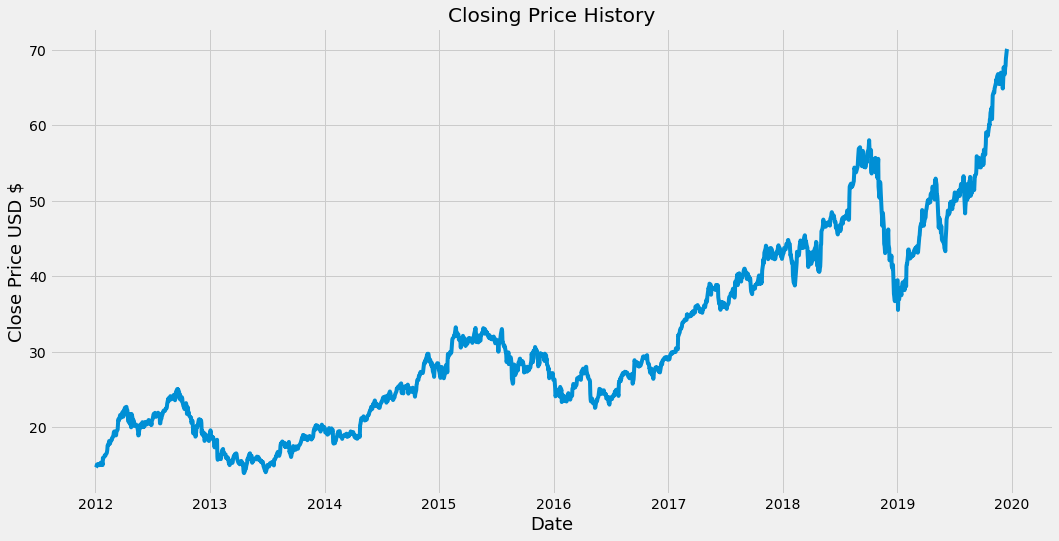

In [ ]:
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Closing Price History')
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD $', fontsize=18)
plt.show()

In [ ]:
# Extract the 'Closing date' colomun and convert it to an array 

data = df['Close'].values 

In [ ]:
# Get the number of rows to train the model provieded that 80% of the data is considered as train_data
import math
len_train_data = math.ceil( len(data) * 0.8 )
len_train_data

1603

In [ ]:
# Scale the data 
scalar = MinMaxScaler(feature_range=(0,1))
scaled_data = scalar.fit_transform(data.reshape(-1, 1))
scaled_data

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [ ]:
#Create the training dataset
train_data = scaled_data[0:len_train_data, :]

#Split the data into x_train and y_train data sets 
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])

  if i <= 60:
    print(x_train)
    print(y_train)

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]


In [ ]:
#Convert the training datasets to numpy array 
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the dependent data for (lST) prediction as lst model expects 3D dataset
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_train.shape


(1543, 60, 1)

In [ ]:
# Build, compile and train  the (lstm) model 
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1543/1543 [==============================] - 50s 30ms/step - loss: 7.7468e-04


In [ ]:
# Create test dataset containing values index between 1543 and 2003
test_data = scaled_data[len_train_data-60:, :]

# Create the datasets for x (dependent) and y(independent)
x_test, y_test = [], data[len_train_data:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  if i <= 60:
    print(x_test)

[array([0.51322235, 0.51958863, 0.53294452, 0.54839284, 0.54581069,
       0.54460864, 0.53071854, 0.53610544, 0.53882114, 0.53815331,
       0.53085209, 0.53935536, 0.55288929, 0.56063573, 0.5528448 ,
       0.5460333 , 0.54696818, 0.54416348, 0.53205414, 0.53178703,
       0.51411273, 0.50333899, 0.4859318 , 0.52079068, 0.50106844,
       0.49278779, 0.49857536, 0.49367817, 0.50129106, 0.51562638,
       0.52092423, 0.50124656, 0.50868133, 0.5229276 , 0.51932152,
       0.52688985, 0.52951649, 0.53436918, 0.54514292, 0.5433621 ,
       0.52092423, 0.48940432, 0.4872674 , 0.47702787, 0.48018873,
       0.48272638, 0.47426767, 0.48735639, 0.50445198, 0.53770815,
       0.53913274, 0.57002938, 0.5759505 , 0.57991274, 0.5857448 ,
       0.59767603, 0.5912207 , 0.58926183, 0.58164901, 0.58939538])]


In [ ]:
# Convert to numpy array as we did for training data
x_test = np.array(x_test)

# Reshape the data for lSTM model 
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [ ]:
#Get the predicted vaues
pred = model.predict(x_test)

# Transform to the origina scale the scaed predicted values 
pred = scalar.inverse_transform(pred)

In [ ]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean(pred - y_test)**2 )
rmse

0.4210715866088867

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


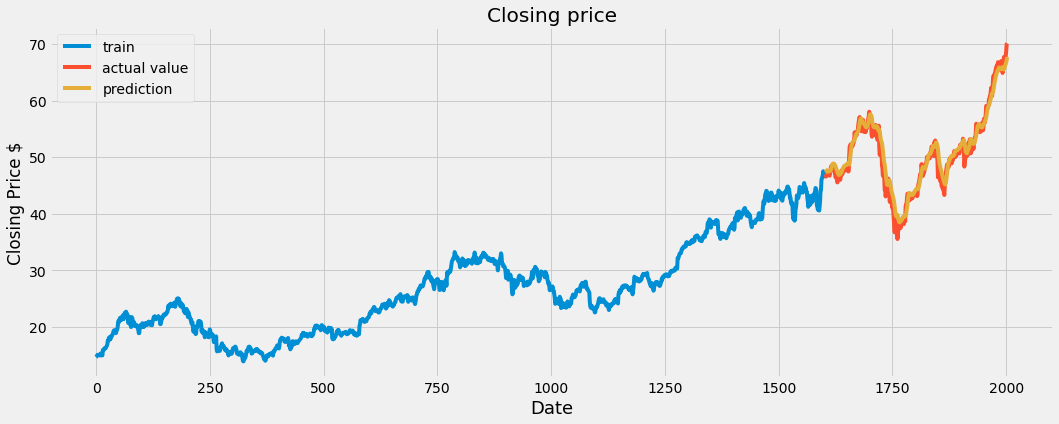

In [ ]:
# Plot the dataset 
data = df.filter(['Close'])
train = data[:len_train_data]
valid = data[len_train_data:]
valid['Predictions'] = pred

plt.figure(figsize=(16, 6))
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price $')
plt.title('Closing price')
plt.legend(['train', 'actual value', 'prediction'], loc = 'upper left')

In [ ]:
valid

,Close,Predictions
1603,46.747501,47.899376
1604,46.577499,47.792721
1605,46.907501,47.635227
1606,46.790001,47.523632
1607,47.090000,47.435333
...,...,...
1998,67.692497,66.187325
1999,67.864998,66.471031
2000,68.787498,66.759369
2001,69.964996,67.142586


In [ ]:
# Predict the closing price for december 18, 2019
app_data = web.DataReader('AAPL', data_source='yahoo', start = '2012-01-01', end='2019-12-17')

# The closing date price data 
close_data = app_data.filter(['Close'])

#Get the Last 60 days closing date price values and convert the dataframe to array
last_60_days = close_data[-60:].values
print()
#Apply MinMaxScaling to scale the data
scaled_data = scalar.transform(last_60_days)
x_test = []
x_test.append(scaled_data)
x_test = np.array(x_test) # To array 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the predicted values for the last 60 days
pred_60 = model.predict(x_test)
pred_price = scalar.inverse_transform(pred_60)
pred_price

array([[68.22489]], dtype=float32)

# Get the actual value 

In [ ]:
price_2019_12_18 = web.DataReader('AAPL', data_source = 'yahoo', start='2019-12-18', end='2019-12-18')
print(price_2019_12_18['Close'].values)

[69.93499756]
